In [180]:
from IPython.core.display import display, HTML
display(HTML("<style>.container{max-width:80%!important;width:auto!important;}</style>"))

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%reload_ext autoreload
%autoreload 2
%matplotlib inline

from tqdm.notebook import trange, tqdm

import cv2
import numpy as np

from tqdm.notebook import tqdm

from pathlib import Path
colour = Path('../GTA_images/Simple/Colour')
depth = Path('../GTA_images/Simple/Depth')

import sys
sys.path.append('../')

from depth_Functions import (
    import_raw_colour_image, 
    import_raw_depth_image, 
    show_img,
    show_array_of_images,
    show_function,
    stand
)

from Feature_Extraction import (
    get_feature_vector,
    get_squared_features,
    get_features_with_squares
)

from Feature_Patches import Patches

from Laplacian import Laplacian, calculate_relative

In [181]:
colour_images = [import_raw_colour_image(str(file)) for file in sorted(colour.iterdir())]
depth_images = [import_raw_depth_image(str(file)) for file in sorted(depth.iterdir())]

In [182]:
train_images = colour_images[:-1]
train_labels = depth_images[:-1]
test_images = colour_images[-1]
test_labels = depth_images[-1]

In [183]:
functions = 3*[get_feature_vector, get_squared_features, get_features_with_squares]
weights = [np.zeros((720,17*3)), np.zeros((720,17*3)), np.zeros((720,34*3))] 
weights = [w+1e-2 for w in weights]

In [255]:
test = Laplacian(np.full((360,1,17),1e-3), np.full((360,1,17,17),1e-8), get_feature_vector)

In [256]:
test.weights.shape
test.var_weights.shape
test.relative_weights.shape
test.relative_var_weights.shape

(360, 1, 17)

(360, 1, 17, 17)

(4, 360, 1, 17)

(4, 360, 1, 17, 17)

In [257]:
test.train(train_images, train_labels)

/opt/conda/envs/bul7cv/lib/python3.7/site-packages/scipy/optimize/minpack.py:795: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


/storage/depth_estimation/Markov_Random_Field/Laplacian.py:94: RuntimeWarning: overflow encountered in exp
  weights = np.array(weights).reshape(features.shape[-1],-1)
/opt/conda/envs/bul7cv/lib/python3.7/site-packages/scipy/optimize/_lsq/common.py:236: RuntimeWarning: overflow encountered in double_scalars
  ratio = actual_reduction / predicted_reduction


KeyboardInterrupt: 

In [213]:
test.weights.shape
test.var_weights.shape
test.relative_weights.shape
test.relative_var_weights.shape

(360, 1, 17)

(360, 1, 17, 17)

(4, 360, 1, 17)

(4, 360, 1, 17, 17)

In [242]:
test_local = test.predict(test_images, relative=False)
test_relative = test.predict(test_images, local=False)
test_complete = test.predict(test_images)

In [243]:
test_local.shape
test_relative[0].shape
test_complete.shape

(720, 1280)

(720, 1280)

(720, 1280)

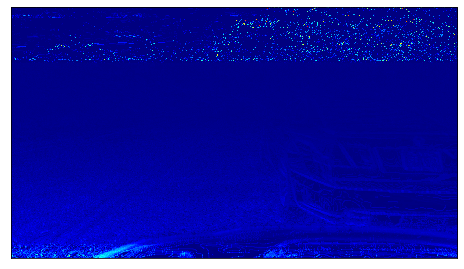

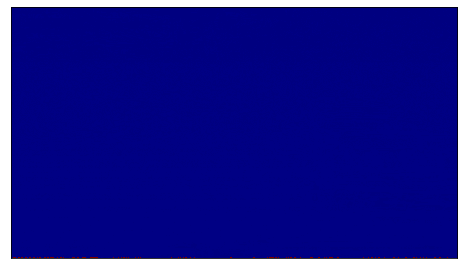

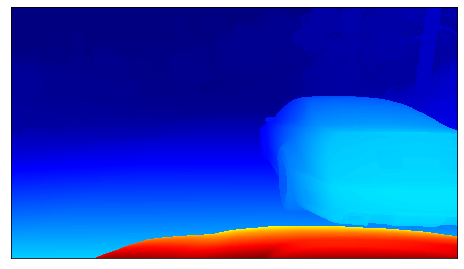

In [244]:
show_img(test_local, depthmap=True)
show_img(test_complete, depthmap=True)
show_img(test_labels, depthmap=True)

In [245]:
np.sum(test_complete - test_labels)

21791.50544575493

In [246]:
np.sum(test_local - test_labels)

14271.147574801524

In [233]:
np.diff(test_labels, axis=1).shape

(720, 1279)

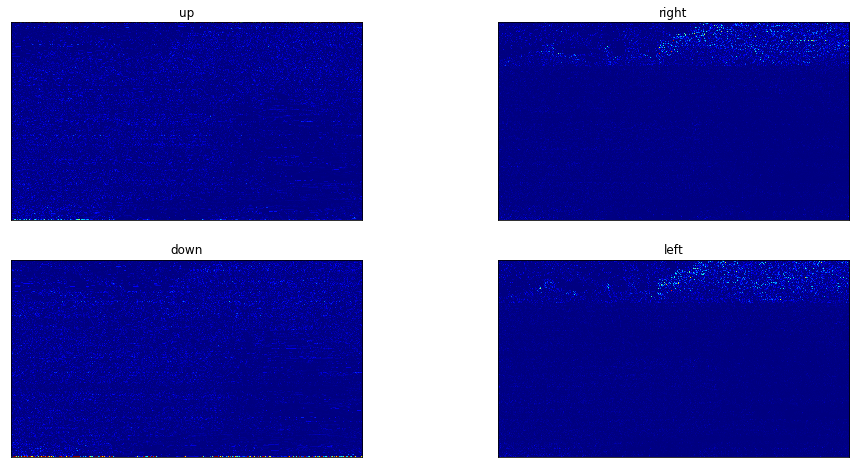

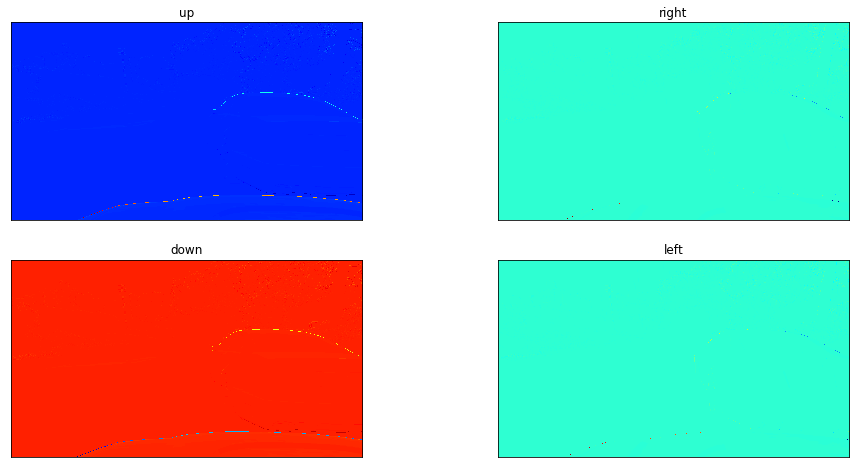

In [248]:
direction = ['up', 'right', 'down', 'left']
show_array_of_images(test_relative, depthmap=True, titles=direction)
show_array_of_images(list(calculate_relative(test_labels)), depthmap=True, titles=direction)

In [275]:
test_linear_exp = Laplacian(np.full((360,1,34),1e-3), np.full((360,1,17),1e-5), get_feature_vector)

In [276]:
test_linear_exp.weights.shape

(360, 1, 34)

In [286]:
test_linear_exp.train_exp_linear(train_images, train_labels)

/storage/depth_estimation/Markov_Random_Field/Laplacian.py:116: RuntimeWarning: invalid value encountered in log
  return output


ValueError: Residuals are not finite in the initial point.

In [269]:
linear_exp_prediction = test_linear_exp.predict_linear_and_exp(test_images)

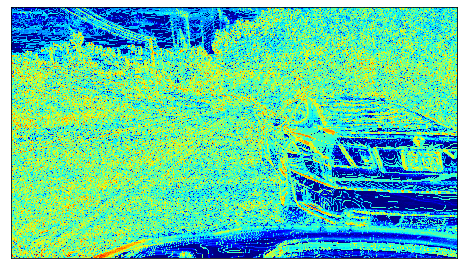

In [271]:
show_img(linear_exp_prediction, depthmap=True)